In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import Sequential

import os
import cv2

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/food/food0118.zip",  "r") as target_file:
  target_file.extractall("/content/drive/MyDrive/food/food0118/")

In [ ]:
# DATA ROOT DIR 설정
DATA_ROOT_DIR = os.path.join('/content/drive/MyDrive/food/food0118') 
label_name_list = os.listdir(DATA_ROOT_DIR)

In [ ]:
import glob
import cv2

image_list=[]
label_list=[]

# 경로 지정
for label_name in label_name_list:
    file_path = os.path.join(DATA_ROOT_DIR, label_name)
    img_file_list=glob.glob(file_path + "/*.*")
    
    # 폴더 별로 반복문 돌리기
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR) # 컬러이미지로 가져오기
        src_img = cv2.resize(src_img, dsize=(128,128)) # 사이즈 조절
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB) # BGR 에서 RGB로 변환
        
        image_list.append(src_img) # X값
        label_list.append(float(label_name)) # Y값

In [ ]:
# list에 담겼는지 확인
print(len(image_list),len(label_list))

22876 22876


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(np.array(image_list),
                                                   np.array(label_list),
                                                   test_size=0.2,
                                                   stratify=np.array(label_list)) # label을 비율에 맞게 설정

In [ ]:
# 정규화
X_train= X_train.astype(np.float32) /255.0
X_test= X_test.astype(np.float32) /255.0

In [ ]:
tr_gen=ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.3,
                           height_shift_range=0.3,
                           zoom_range= 0.1)

idg_tr= tr_gen.flow(X_train, y_train, batch_size=128, shuffle=True)

In [ ]:
# 모바일넷
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
base_model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32) 

In [ ]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/food/yespizza.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [ ]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
#                               patience=5,          # 5회 Epoch동안 개선되지 않는다면 종료
#                              )


start_time = datetime.now()

hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=128) #callbacks=[earlystopping]

end_time = datetime.now()
print('elapsed time = ', end_time-start_time)

Epoch 1/50
143/143 [==============================] - 46s 244ms/step - loss: 1.7140 - accuracy: 0.7802 - val_loss: 0.5882 - val_accuracy: 0.8029
Epoch 2/50
143/143 [==============================] - 33s 227ms/step - loss: 0.4623 - accuracy: 0.8425 - val_loss: 0.2730 - val_accuracy: 0.9001
Epoch 3/50
143/143 [==============================] - 33s 228ms/step - loss: 0.3095 - accuracy: 0.8909 - val_loss: 0.1715 - val_accuracy: 0.9414
Epoch 4/50
143/143 [==============================] - 33s 234ms/step - loss: 0.2391 - accuracy: 0.9170 - val_loss: 0.1201 - val_accuracy: 0.9659
Epoch 5/50
143/143 [==============================] - 33s 232ms/step - loss: 0.1861 - accuracy: 0.9398 - val_loss: 0.0960 - val_accuracy: 0.9747
Epoch 6/50
143/143 [==============================] - 33s 234ms/step - loss: 0.1553 - accuracy: 0.9499 - val_loss: 0.0869 - val_accuracy: 0.9781
Epoch 7/50
143/143 [==============================] - 34s 234ms/step - loss: 0.1373 - accuracy: 0.9572 - val_loss: 0.0803 - val_ac

In [ ]:
# evaluation
model.evaluate(X_test, y_test)

143/143 [==============================] - 2s 14ms/step - loss: 0.0773 - accuracy: 0.9862


[0.0772622749209404, 0.9862325191497803]

In [47]:
model.save('model0118.h5')

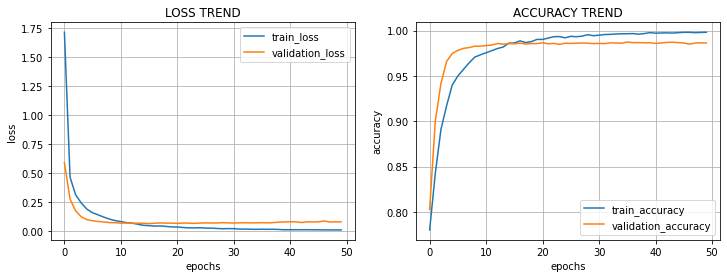

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title("LOSS TREND")
plt.xlabel("epochs")
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='validation_loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title("ACCURACY TREND")
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='validation_accuracy')
plt.legend(loc='best')
     

In [35]:
#내가 찍은 돈까스
test_img10 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/for_test/KakaoTalk_20230117_154648765.jpg", cv2.IMREAD_COLOR) # 컬러이미지로 가져오기
test_img10= cv2.resize(test_img10, dsize=(128,128)) # 사이즈 조절
test_img10 = cv2.cvtColor(test_img10, cv2.COLOR_BGR2RGB) # BGR 에서 RGB로 변환

test_img10=test_img10 /255.0

pred10 = model.predict(test_img10.reshape(-1, 128,128,3))
score10=tf.nn.softmax(pred10)

print("{:.2f}percnet confidence.".format( 100*np.max(score10)))
print(score10)

1/1 [==============================] - 0s 20ms/step
31.18percnet confidence.
tf.Tensor(
[[0.1147015  0.1147015  0.1147015  0.1147015  0.31179097 0.1147015
  0.1147015 ]], shape=(1, 7), dtype=float32)


In [ ]:
#교촌치킨
test_img11 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/for_test/KakaoTalk_20230117_154723479.jpg", cv2.IMREAD_COLOR) # 컬러이미지로 가져오기
test_img11= cv2.resize(test_img11, dsize=(128,128)) # 사이즈 조절
test_img11 = cv2.cvtColor(test_img11, cv2.COLOR_BGR2RGB) # BGR 에서 RGB로 변환

test_img11=test_img11 /255.0

pred11 = model.predict(test_img11.reshape(-1,128,128,3))
score11=tf.nn.softmax(pred11)

print("{:.2f}percnet confidence.".format( 100*np.max(score11)))
print(score11)

1/1 [==============================] - 0s 17ms/step
31.18percnet confidence.
tf.Tensor(
[[0.11470167 0.3117894  0.11470167 0.11470172 0.11470175 0.11470196
  0.11470187]], shape=(1, 7), dtype=float32)


In [40]:

# 이미지 불러오기
src_img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/for_test/8.jpg", cv2.IMREAD_COLOR)


#넘파이 배열로 불러옴
print(type(src_img1), src_img1.shape)



# RGB로 색상순서변환
dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)


# 테스트하기 위해서 이미지 가공
dst_img1 = cv2.resize(dst_img1, dsize=(128, 128))

print(dst_img1.shape)

# 정규화
dst_img1 = dst_img1 / 255.0


<class 'numpy.ndarray'> (194, 259, 3)
(128, 128, 3)


In [41]:
test_image_list = []

test_image_list.append(dst_img1)

test_image_array = np.array(test_image_list) #3차원 한번더 묶어서 4차원으로 차원 맞추기
test_image_array.shape

(1, 128, 128, 3)

In [42]:

pred = model.predict(test_image_array)

1/1 [==============================] - 0s 17ms/step


In [46]:
# 스시 31퍼센트로 적중
score=tf.nn.softmax(pred)
print(score*100)

tf.Tensor([[11.47015  11.47015  11.47015  11.47015  11.47015  11.47015  31.179098]], shape=(1, 7), dtype=float32)
